![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

In [42]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run Session_5_6_EXERCISES_Helper.ipynb
%run Session_5_6_EXERCISES_Plot.ipynb

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

shape of image: (300, 451, 3)
dtype of image: uint8


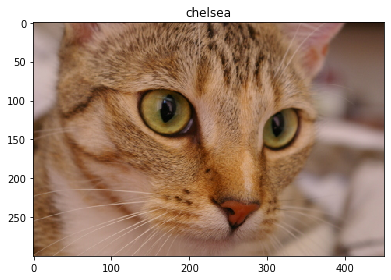

In [43]:
#Load the image 
img = data.chelsea()

# Plotting
fig, ax = plt.subplots(nrows = 1, ncols=1, sharex=False, sharey=False, figsize=(11, 4))

ax.imshow(img)
ax.set_title('chelsea')

plt.tight_layout()
plt.show;

#plt.imshow(img)
#img_desc = plt.gca()
#plt.set_cmap('gray')

#plt.imshow(img, cmap=plt.cm.gray)
print("shape of image: {}".format(img.shape))
#uint8 --> 0 to 255
print("dtype of image: {}".format(img.dtype))
#print(img_desc)
#uint8 --> 0 to 255

<p align="left" style="font-size:16px"><b> Crop the image </b></p>

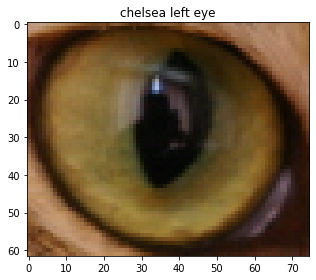

In [44]:
#image[y1:y2, x1:x2]
left_eye = img[85:147,135:210]

# Plotting
fig, ax = plt.subplots(nrows = 1, ncols=1, sharex=False, sharey=False, figsize=(11, 4))

ax.imshow(left_eye)
ax.set_title('chelsea left eye')

plt.tight_layout()
plt.show;

<p align="left" style="font-size:16px"><b> Smoothen the image with a kernel filter. </b></p>

In [45]:
#type(left_eye)
print(left_eye.ndim)
x = left_eye[0:1]
y = left_eye[1:2]
z = left_eye[2:3]
print(x.size)
print(y.size)
print(z.size)

3
225
225
225


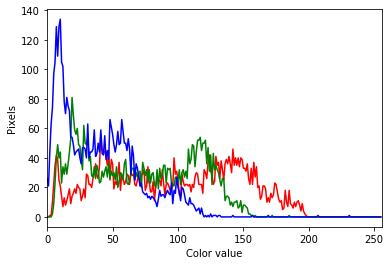

In [46]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html
# Make the plot
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        left_eye[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

In [47]:
#Y = np.arange(left_eye.shape[0])
#X = np.arange(left_eye.shape[1])
#Z1 = left_eye[...,0]
#Z2 = left_eye[...,1]
#Z3 = left_eye[...,2]
#X, Y = np.meshgrid(X, Y)
#plot_3d(X, Y, Z1, cmap='Reds', title='3D plot for the Red Channel')
#plot_3d(X, Y, Z2, cmap='Greens', title='3D plot for the Green Channel')
#plot_3d(X, Y, Z3, cmap='Blues', title='3D plot for the Blue Channel')

#print("########")
#print(left_eye.shape)
#print(left_eye)
#print("########")
#print(Y.shape)
#print(Y)
#print("########")
#print(X.shape)
#print(X)
#print("########")
#print(Z1.shape)
#print(Z1)
#print("########")
#print(Z2.shape)
#print(Z2)
#print("########")
#print(Z3.shape)
#print(Z3)


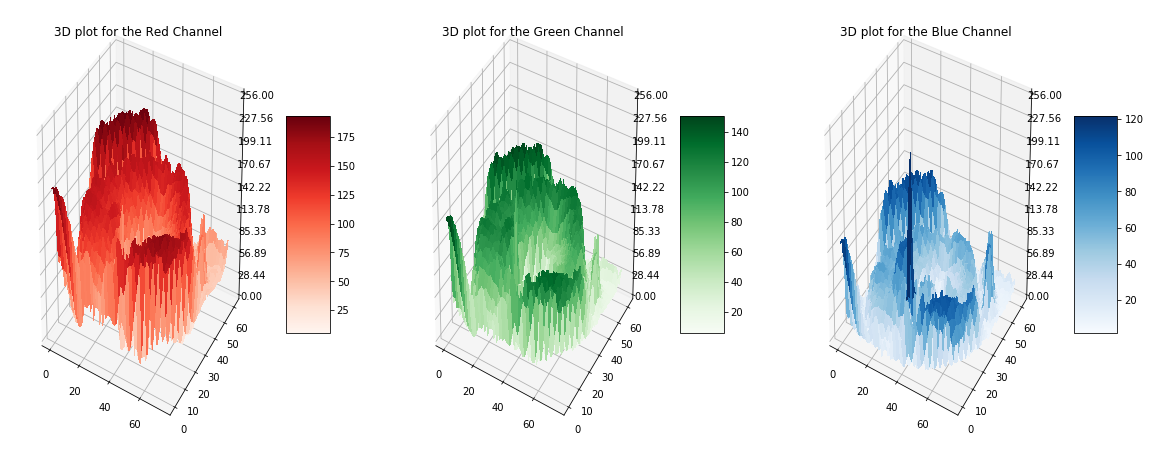

In [48]:
Y = np.arange(left_eye.shape[0])
X = np.arange(left_eye.shape[1])
Z1 = left_eye[...,0]
Z2 = left_eye[...,1]
Z3 = left_eye[...,2]
X, Y = np.meshgrid(X, Y)

plot_3d_rgb_3axes_2(X, Y, Z1, Z2, Z3, title1='3D plot for the Red Channel', title2='3D plot for the Green Channel', title3='3D plot for the Blue Channel', cmap1='Reds', cmap2='Greens', cmap3='Blues')
#plot_3d_rgb_3axes(X, Y, Z1, Z2, Z3, title='3D plot for the Red Channel', cmap='Reds')

In [49]:
#ax = plt.axes(projection='3d')
#Z = fig(X, Y)
#ax.scatter(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5);

<p align="left" style="font-size:16px"><b> Smoothen the image with a kernel filter. </b></p>

In [50]:
emboss_kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])

emboss_kernel.ndim

2

In [51]:
#Stimating noise std accross color channels
sigma_est = estimate_sigma(left_eye, multichannel=True, average_sigmas=True)
print("sigma_est: {}".format(sigma_est))

sigma_est: 2.1664838782139486


shape of image: (62, 75, 3)


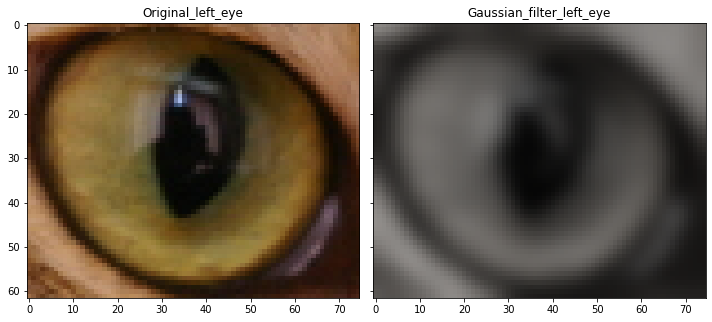

In [52]:
#Using built in functions
Gaussian_filter_left_eye = smooth_img(image = left_eye, sigma_est = sigma_est, mode = SmoothMode.GAUSSIANBLUR)
print("shape of image: {}".format(Gaussian_filter_left_eye.shape))
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 10))

ax[0].imshow(left_eye)
ax[0].set_title('Original_left_eye')

ax[1].imshow(Gaussian_filter_left_eye)
ax[1].set_title('Gaussian_filter_left_eye')

plt.tight_layout()
plt.show()

In [53]:
#Checking the arrays after filtering
compare_two_arrays(left_eye, Gaussian_filter_left_eye)

False

shape of image Gaussian: (62, 75, 3)


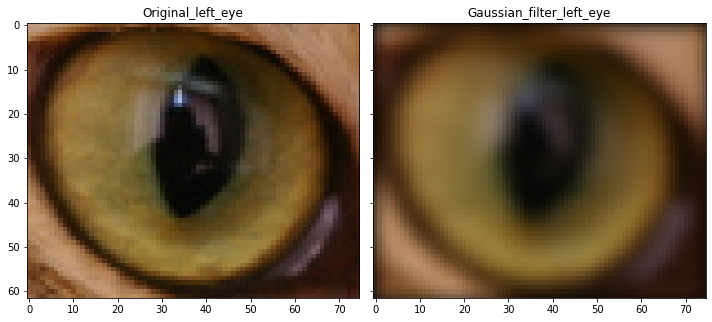

In [54]:
#Using My own functions
Gaussian_Axis_filter_left_eye = ReadyMadeKernel_img_RGB(image = left_eye, sigma_est = sigma_est, ready_made_kernel = ReadyMadeKernel.GAUSSIANAXIS)
print("shape of image Gaussian: {}".format(Gaussian_Axis_filter_left_eye.shape))
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 10))

ax[0].imshow(left_eye)
ax[0].set_title('Original_left_eye')

ax[1].imshow(Gaussian_Axis_filter_left_eye)
ax[1].set_title('Gaussian_filter_left_eye')

plt.tight_layout()
plt.show()

In [55]:
#Checking the arrays after filtering
compare_two_arrays(left_eye, Gaussian_Axis_filter_left_eye)

False

<p align="left" style="font-size:16px"><b> Sharpen the image with a kernel filter. </b></p>

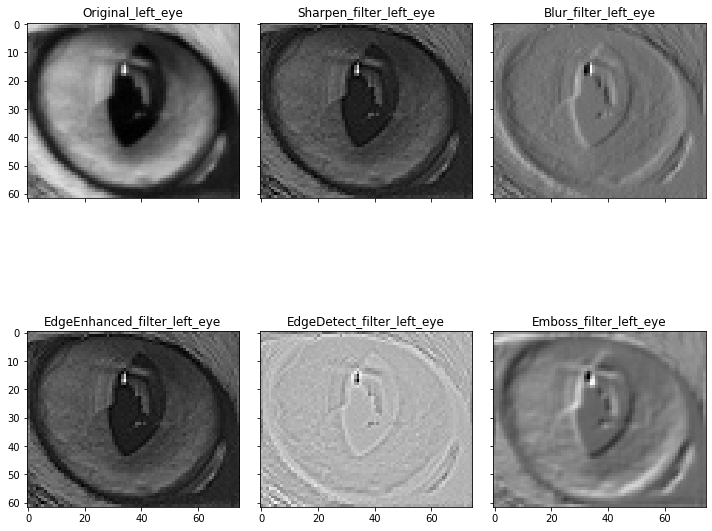

In [56]:
#Trying to apply Other kernel filters directly to a 2D image.
left_eye_gray = color.rgb2gray(left_eye)
Sharpen_filter_left_eye = ReadyMadeKernel_img_RGB(image = left_eye_gray, sigma_est = None, ready_made_kernel = ReadyMadeKernel.SHARPEN)
Blur_filter_left_eye = ReadyMadeKernel_img_RGB(image = left_eye_gray, sigma_est = None, ready_made_kernel = ReadyMadeKernel.BLUR)
EdgeEnhanced_filter_left_eye = ReadyMadeKernel_img_RGB(image = left_eye_gray, sigma_est = None, ready_made_kernel = ReadyMadeKernel.EDGEENHANCED)
EdgeDetect_filter_left_eye = ReadyMadeKernel_img_RGB(image = left_eye_gray, sigma_est = None, ready_made_kernel = ReadyMadeKernel.EDGEDETECT)
Emboss_filter_left_eye = ReadyMadeKernel_img_RGB(image = left_eye_gray, sigma_est = None, ready_made_kernel = ReadyMadeKernel.EMBOSS)

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10, 10))

ax[0,0].imshow(left_eye_gray, cmap=plt.cm.gray)
ax[0,0].set_title('Original_left_eye')

ax[0,1].imshow(Sharpen_filter_left_eye, cmap=plt.cm.gray)
ax[0,1].set_title('Sharpen_filter_left_eye')

ax[0,2].imshow(Blur_filter_left_eye, cmap=plt.cm.gray)
ax[0,2].set_title('Blur_filter_left_eye')

ax[1,0].imshow(EdgeEnhanced_filter_left_eye, cmap=plt.cm.gray)
ax[1,0].set_title('EdgeEnhanced_filter_left_eye')

ax[1,1].imshow(EdgeDetect_filter_left_eye, cmap=plt.cm.gray)
ax[1,1].set_title('EdgeDetect_filter_left_eye')

ax[1,2].imshow(Emboss_filter_left_eye, cmap=plt.cm.gray)
ax[1,2].set_title('Emboss_filter_left_eye')

plt.tight_layout()
plt.show()

<p align="left" style="font-size:16px"><b> Find the edges of the image with at least two different methods. </b></p>

left_eye_gray: (62, 75)


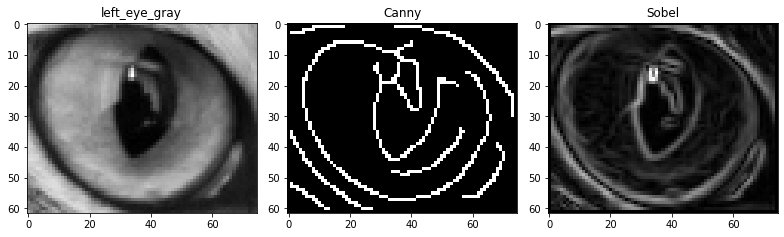

In [57]:
#Using built in functions
#Canny and sobel filters: The parameter `image` must be a 2-dimensional array
#Canny_filter_left_eye = feature.canny(left_eye, sigma=3)

left_eye_gray = color.rgb2gray(left_eye)

print("left_eye_gray: {}".format(left_eye_gray.shape))

left_eye_gray_canny = feature.canny(image = left_eye_gray, sigma=sigma_est)

left_eye_gray_canny_sobel = filters.sobel(image = left_eye_gray)

# Plotting
fig, ax = plt.subplots(nrows = 1, ncols=3, sharex=False, sharey=False, figsize=(11, 4))

ax[0].imshow(left_eye_gray, cmap=plt.cm.gray)
ax[0].set_title('left_eye_gray')

ax[1].imshow(left_eye_gray_canny, cmap=plt.cm.gray)
ax[1].set_title('Canny')

ax[2].imshow(left_eye_gray_canny_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

plt.tight_layout()
plt.show()

<p align="left" style="font-size:16px"><b> From the processes above, save the image that you prefer as a .jpg </b></p>

In [58]:
#Save the image to jpg file
io.imsave("Gaussian_Axis_filter_left_eye.jpeg", Gaussian_Axis_filter_left_eye)

In [59]:
!ls -ltr Gaussian_Axis_filter_left_eye.jpeg

-rw-r--r-- 1 root root 1345 Nov 22 14:05 Gaussian_Axis_filter_left_eye.jpeg


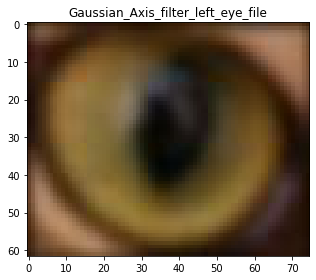

In [60]:
#Method_1: Load jpg image from file
Gaussian_Axis_filter_left_eye_file = io.imread("Gaussian_Axis_filter_left_eye.jpeg", as_gray=False)

# Plotting
fig, ax = plt.subplots(nrows = 1, ncols=1, sharex=False, sharey=False, figsize=(11, 4))

ax.imshow(Gaussian_Axis_filter_left_eye_file)
ax.set_title('Gaussian_Axis_filter_left_eye_file')

plt.tight_layout()
plt.show;

In [61]:
%run Session_5_6_EXERCISES_Helper.ipynb
%run Session_5_6_EXERCISES_Plot.ipynb

In [62]:
#Method_2: Save NumPy Array to .NPZ File (I know that for this image compression is not worth it)
# save to npy file
savez_compressed('Gaussian_Axis_filter_left_eye_file.npz', Gaussian_Axis_filter_left_eye_file)

In [63]:
!ls -ltr Gaussian_Axis_filter_left_eye_file.npz

-rw-r--r-- 1 root root 11952 Nov 22 14:05 Gaussian_Axis_filter_left_eye_file.npz


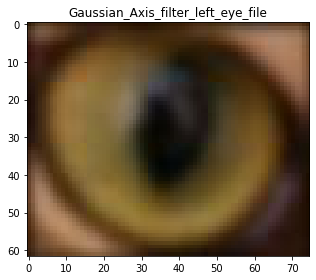

In [64]:
#Loading a NumPy Array from NPZ File

# load dict of arrays
dict_Gaussian_Axis_filter_left_eye_file = load('Gaussian_Axis_filter_left_eye_file.npz')

#for pair in dict_Gaussian_Axis_filter_left_eye_file.items():
#    print(pair)

# extract the first array
dict_Gaussian_Axis_filter_left_eye_array = dict_Gaussian_Axis_filter_left_eye_file['arr_0']

# print the array
#print(dict_Gaussian_Axis_filter_left_eye_array)

# Plotting
fig, ax = plt.subplots(nrows = 1, ncols=1, sharex=False, sharey=False, figsize=(11, 4))

ax.imshow(dict_Gaussian_Axis_filter_left_eye_array)
ax.set_title('Gaussian_Axis_filter_left_eye_file')

plt.tight_layout()
plt.show;

# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms